In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[800.0, 1600.0, 3200.0, 6400.0, 12800.0, 25600.0, 51200.0, 102400.0, 204800.0]


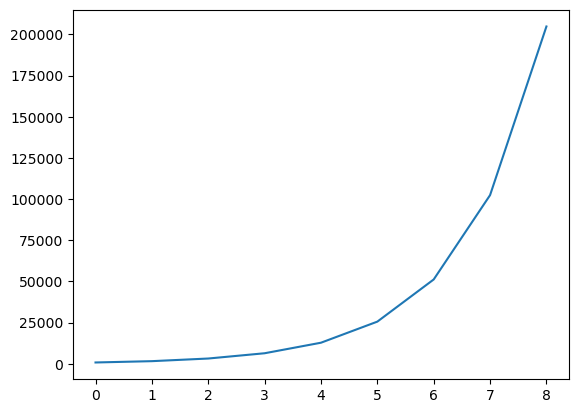

In [3]:
n_sys = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
diameters = [400/(2*sys) for sys in n_sys]
chain_times = [sys*400/4 for sys, diameter in zip(n_sys, diameters)]
print(chain_times)
plt.plot(chain_times)

In [14]:
# calculate dynamic h_i
n_particles = 64
length = 400
diameter = length/(2*n_particles)
initial_pos = [diameter/2 + i*diameter for i in range(n_particles)]
uniform_dist = [length/n_particles * i - diameter for i in range(1,n_particles + 1)]

print(initial_pos)
print(uniform_dist)
#di = xi+1 - x - 2sigma
dis = []
for i in range(n_particles):
    next_idx = (i+1)%n_particles

    di = initial_pos[next_idx] - initial_pos[i] - diameter
    if initial_pos[next_idx] < initial_pos[i]:
        di += length

    
    dis.append(di)
dis = np.array(dis)
print(np.mean(dis)**2, np.mean(dis**2))

print(np.sqrt(np.abs(np.mean(dis)**2 - np.mean(dis**2))))


[1.5625, 4.6875, 7.8125, 10.9375, 14.0625, 17.1875, 20.3125, 23.4375, 26.5625, 29.6875, 32.8125, 35.9375, 39.0625, 42.1875, 45.3125, 48.4375, 51.5625, 54.6875, 57.8125, 60.9375, 64.0625, 67.1875, 70.3125, 73.4375, 76.5625, 79.6875, 82.8125, 85.9375, 89.0625, 92.1875, 95.3125, 98.4375, 101.5625, 104.6875, 107.8125, 110.9375, 114.0625, 117.1875, 120.3125, 123.4375, 126.5625, 129.6875, 132.8125, 135.9375, 139.0625, 142.1875, 145.3125, 148.4375, 151.5625, 154.6875, 157.8125, 160.9375, 164.0625, 167.1875, 170.3125, 173.4375, 176.5625, 179.6875, 182.8125, 185.9375, 189.0625, 192.1875, 195.3125, 198.4375]
[3.125, 9.375, 15.625, 21.875, 28.125, 34.375, 40.625, 46.875, 53.125, 59.375, 65.625, 71.875, 78.125, 84.375, 90.625, 96.875, 103.125, 109.375, 115.625, 121.875, 128.125, 134.375, 140.625, 146.875, 153.125, 159.375, 165.625, 171.875, 178.125, 184.375, 190.625, 196.875, 203.125, 209.375, 215.625, 221.875, 228.125, 234.375, 240.625, 246.875, 253.125, 259.375, 265.625, 271.875, 278.125, 284.37

11.395699703005938


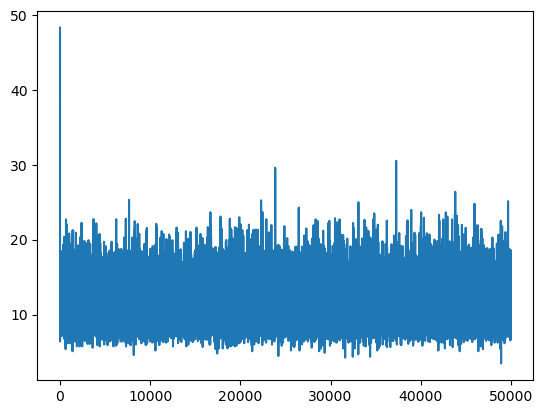

In [9]:
df = pd.read_csv("../cpp-monte-carlo-simulations/var_runs/16/ecmc_ff_sf_10m-16-1.csv")
random_hi = np.array(df["his"].to_list())

print(random_hi.mean())
plt.plot(random_hi)